In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("USA_COVID_19.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [4]:
df.shape

(58, 18)

In [5]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
df=pd.read_csv("USA_COVID_19.csv",parse_dates=['Last_Update'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [9]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

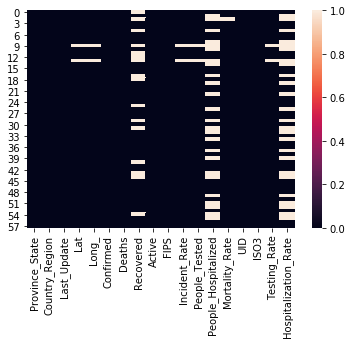

In [10]:
sns.heatmap(df.isnull())

In [11]:
# Missing Values are present.

In [12]:
df['Province_State'].value_counts()

Indiana                     1
Washington                  1
Virginia                    1
New Mexico                  1
Massachusetts               1
Arizona                     1
Missouri                    1
Kentucky                    1
Georgia                     1
Louisiana                   1
Michigan                    1
Oregon                      1
Montana                     1
District of Columbia        1
Texas                       1
Oklahoma                    1
Alabama                     1
Grand Princess              1
Connecticut                 1
Maryland                    1
Pennsylvania                1
Idaho                       1
Illinois                    1
Nevada                      1
Maine                       1
Tennessee                   1
Delaware                    1
California                  1
Rhode Island                1
New Jersey                  1
New Hampshire               1
South Carolina              1
Vermont                     1
Kansas    

In [13]:
df['Country_Region'].unique()

array(['US'], dtype=object)

In [14]:
df['Last_Update'].unique()

array(['2020-05-21T02:32:54.000000000'], dtype='datetime64[ns]')

In [15]:
df['Last_Update'].value_counts()

2020-05-21 02:32:54    58
Name: Last_Update, dtype: int64

In [16]:
df['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [17]:
df['ISO3'].value_counts()

USA    53
PRI     1
ASM     1
VIR     1
GUM     1
MNP     1
Name: ISO3, dtype: int64

In [18]:
#Discription of categorical columns
df.describe(include='O')

,Province_State,Country_Region,ISO3
count,58,58,58
unique,58,1,6
top,Indiana,US,USA
freq,1,58,53


In [19]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


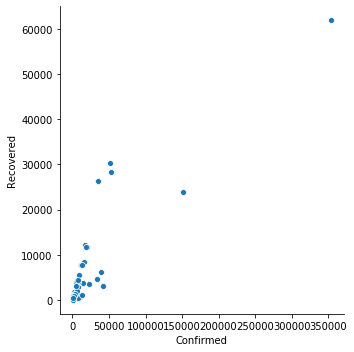

In [20]:
sns.relplot(x='Confirmed',y='Recovered',data=df)

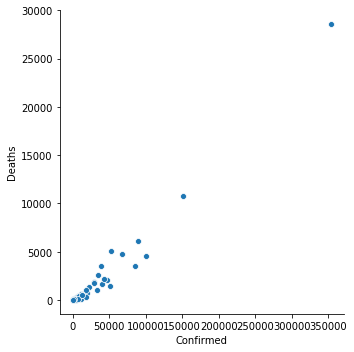

In [21]:
sns.relplot(x='Confirmed',y='Deaths',data=df)

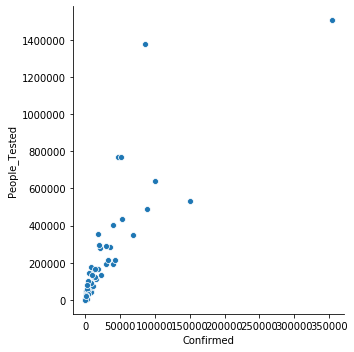

In [22]:
sns.relplot(x='Confirmed',y='People_Tested',data=df)

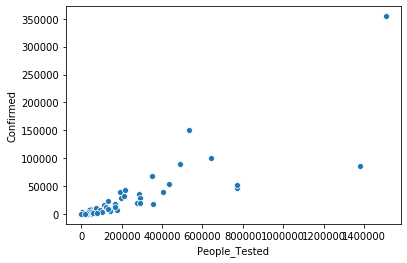

In [23]:
# Scatter Plot Between people_tested and confirmed cases
sns.scatterplot(x='People_Tested',y='Confirmed',data=df)

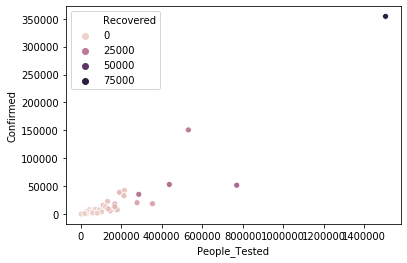

In [24]:
sns.scatterplot(x='People_Tested',y='Confirmed',hue="Recovered",data=df)

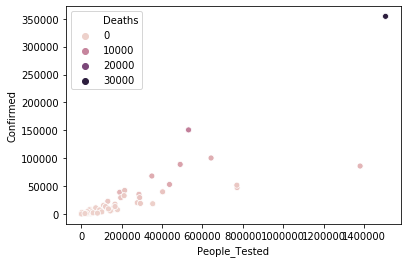

In [25]:
sns.scatterplot(x='People_Tested',y='Confirmed',hue="Deaths",data=df)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text xticklabel objects>)

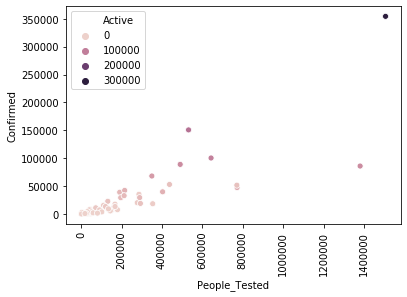

In [26]:
sns.scatterplot(x='People_Tested',y='Confirmed',hue="Active",data=df)
plt.xticks(rotation=90)

<Figure size 1080x720 with 0 Axes>

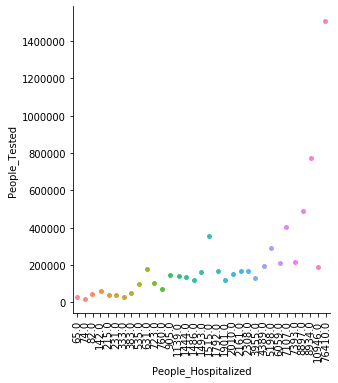

In [27]:
plt.figure(figsize=(15,10))
sns.catplot(y='People_Tested',x='People_Hospitalized',data=df)
plt.xticks(rotation=90)
plt.show()

<Figure size 720x576 with 0 Axes>

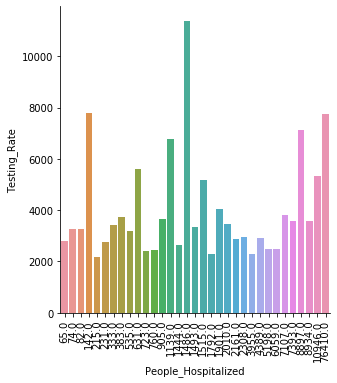

In [28]:
plt.figure(figsize=(10,8))
sns.catplot(x='People_Hospitalized',y='Testing_Rate',kind="bar",data=df)
plt.xticks(rotation=90)
plt.show()

In [29]:
# TO CHECK CORRELATION:
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


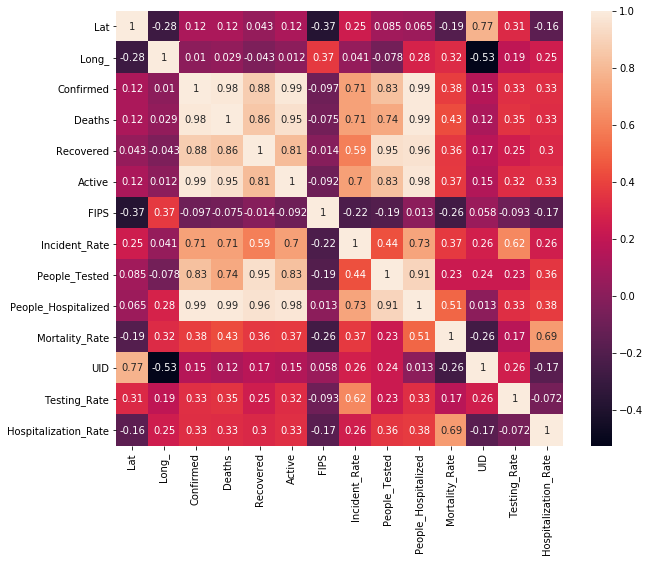

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

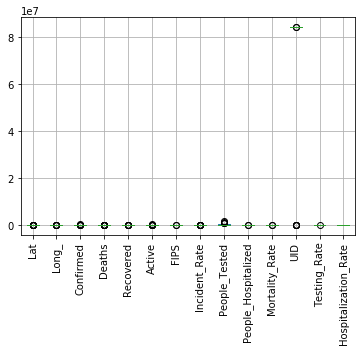

In [31]:
df.boxplot()
plt.xticks(rotation=90)

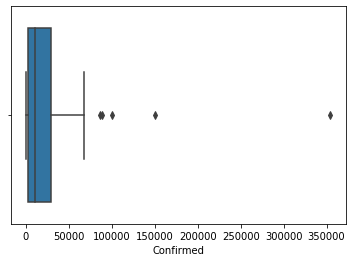

In [32]:
sns.boxplot(df['Confirmed'])

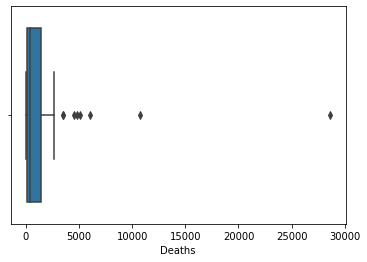

In [33]:
sns.boxplot(df['Deaths'])

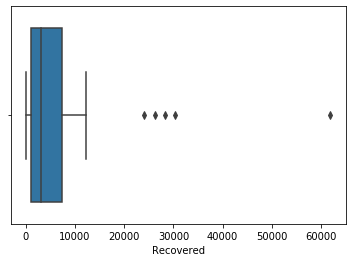

In [34]:
sns.boxplot(df['Recovered'])

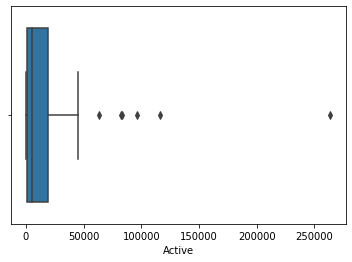

In [35]:
sns.boxplot(df['Active'])

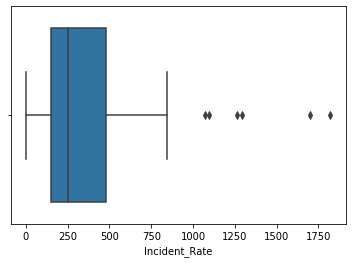

In [36]:
sns.boxplot(df['Incident_Rate'])

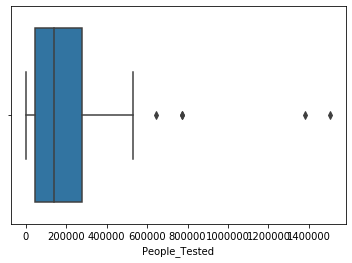

In [37]:
sns.boxplot(df['People_Tested'])

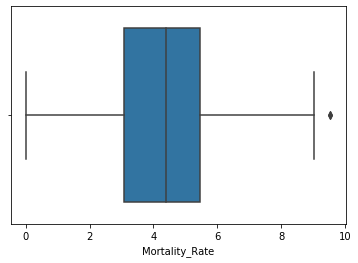

In [38]:
sns.boxplot(df['Mortality_Rate'])

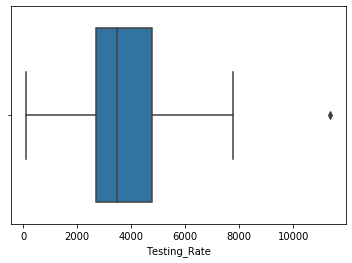

In [39]:
sns.boxplot(df['Testing_Rate'])

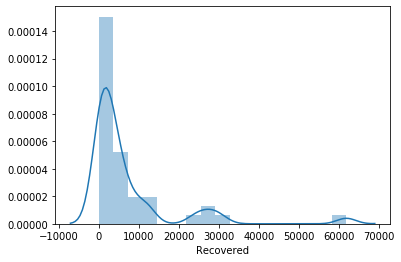

In [40]:
sns.distplot(df['Recovered'])

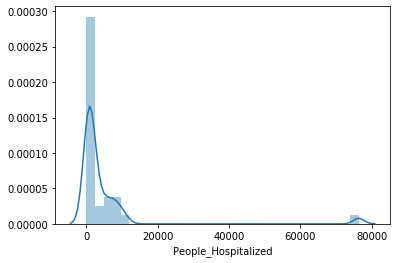

In [41]:
sns.distplot(df['People_Hospitalized'])

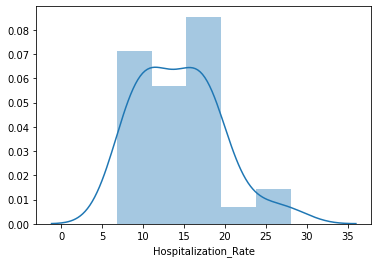

In [42]:
sns.distplot(df['Hospitalization_Rate'])

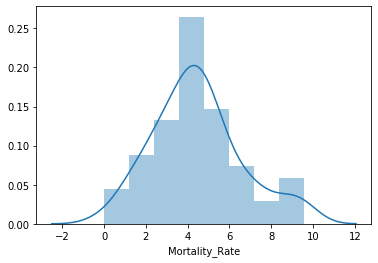

In [43]:
sns.distplot(df['Mortality_Rate'])

# DATA CLEANING AND IMPUTING

In [44]:
# Dropping those columns which do not have much impact on Active cases.
df.drop(['Country_Region','Last_Update'],axis=1,inplace=True)

In [45]:
# imputing Missing Values
df['Recovered'].fillna(df['Recovered'].median(),inplace=True)

In [46]:
df['People_Hospitalized'].fillna(df['People_Hospitalized'].median(),inplace=True)

In [47]:
df.drop('Hospitalization_Rate',axis=1,inplace=True)

In [48]:
df.drop(['Lat',"Long_"],axis=1,inplace=True)

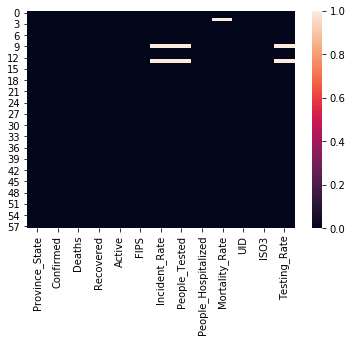

In [49]:
sns.heatmap(df.isnull())

In [50]:
df['Incident_Rate'].fillna(df['Incident_Rate'].median(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].median(),inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(),inplace=True)
df['Testing_Rate'].fillna(df['Testing_Rate'].mean(),inplace=True)

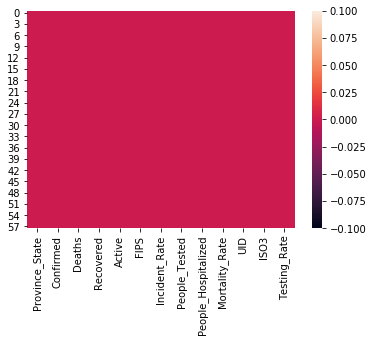

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       58 non-null     object 
 1   Confirmed            58 non-null     int64  
 2   Deaths               58 non-null     int64  
 3   Recovered            58 non-null     float64
 4   Active               58 non-null     float64
 5   FIPS                 58 non-null     int64  
 6   Incident_Rate        58 non-null     float64
 7   People_Tested        58 non-null     float64
 8   People_Hospitalized  58 non-null     float64
 9   Mortality_Rate       58 non-null     float64
 10  UID                  58 non-null     int64  
 11  ISO3                 58 non-null     object 
 12  Testing_Rate         58 non-null     float64
dtypes: float64(7), int64(4), object(2)
memory usage: 6.0+ KB


# Labelling the categorical variables and scaling the data

In [53]:
# USE LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Province_State']=lb.fit_transform(df['Province_State'])
df['ISO3']=lb.fit_transform(df['ISO3'])

In [54]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
0,0,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386
1,1,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017
2,2,0,0,3008.0,0.0,60,0.000000,124.0,1493.0,4.458248,16,0,222.857246
3,3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351
4,4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370


In [55]:
df.drop('Province_State',axis=1,inplace=True)

In [56]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017
2,0,0,3008.0,0.0,60,0.000000,124.0,1493.0,4.458248,16,0,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370


#Removing the outliers

In [57]:
print("data shape before zscore", df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("data shape after zscore", df.shape)

data shape before zscore (58, 12)
data shape after zscore (47, 12)


In [58]:
# checking and removing skewness
df.skew()

Confirmed              1.849613
Deaths                 2.001798
Recovered              2.734245
Active                 2.379176
FIPS                   0.042193
Incident_Rate          1.593314
People_Tested          1.788602
People_Hospitalized    1.956220
Mortality_Rate         0.528123
UID                    0.042193
ISO3                   0.000000
Testing_Rate           1.196266
dtype: float64

In [59]:
df["Active_New"]=df['Active']
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Active_New
0,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386,12530.0
1,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017,39.0
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351,10386.0
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370,1044.0
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,4,2289.339188,18020.0


In [60]:
df.drop('Active',axis=1,inplace=True)

In [61]:
# Spliting the data into x and y
x=df.iloc[:,:-1]
y=pd.DataFrame(df.iloc[:,-1])
x.head()

,Confirmed,Deaths,Recovered,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,3008.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386
1,401,10,352.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017
3,14906,747,3773.0,4,204.788838,165435.0,1792.0,5.011405,84000004,4,2272.859351
4,5003,107,3852.0,5,165.782801,96258.0,535.0,2.138717,84000005,4,3189.670370
6,22797,1299,3478.0,8,395.868121,131837.0,3955.0,5.698118,84000008,4,2289.339188


In [62]:
y.head()

,Active_New
0,12530.0
1,39.0
3,10386.0
4,1044.0
6,18020.0


In [63]:
print(x.shape)
print(y.shape)

(47, 11)
(47, 1)


In [64]:
x.skew()

Confirmed              1.849613
Deaths                 2.001798
Recovered              2.734245
FIPS                   0.042193
Incident_Rate          1.593314
People_Tested          1.788602
People_Hospitalized    1.956220
Mortality_Rate         0.528123
UID                    0.042193
ISO3                   0.000000
Testing_Rate           1.196266
dtype: float64

In [65]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [66]:
x.skew()

Confirmed              0.786695
Deaths                 1.069853
Recovered              1.622735
FIPS                   0.042193
Incident_Rate          0.809832
People_Tested          0.870615
People_Hospitalized    1.033817
Mortality_Rate         0.528123
UID                    0.042193
ISO3                   0.000000
Testing_Rate           0.886229
dtype: float64

In [67]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [68]:
x.skew()

Confirmed             -0.540498
Deaths                -0.270438
Recovered              0.069567
FIPS                   0.042193
Incident_Rate         -0.142400
People_Tested         -0.088545
People_Hospitalized   -0.598687
Mortality_Rate         0.528123
UID                    0.042193
ISO3                   0.000000
Testing_Rate           0.592296
dtype: float64

# Applying Standardscaler for scaling data

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.207977,0.180245,0.043424,-1.766169,-0.031653,0.258493,0.118958,-0.159618,-1.766169,0.0,-0.203538
1,-2.293584,-2.086529,-1.919365,-1.702803,-2.015495,-1.341096,0.118958,-0.960464,-1.702803,0.0,1.068161
2,0.304804,0.403981,0.253861,-1.576070,-0.369367,0.264910,0.273396,0.378678,-1.576070,0.0,-1.400448
3,-0.489151,-0.784551,0.273125,-1.512704,-0.639392,-0.316768,-0.741690,-1.149316,-1.512704,0.0,-0.358256
4,0.614863,0.752092,0.178207,-1.322605,0.484198,0.021021,0.946588,0.743944,-1.322605,0.0,-1.378265


In [70]:
y=scaler.fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,-0.099942
1,-0.698336
2,-0.202652
3,-0.650190
4,0.163062


# Calculating best r_state for train_test_split

In [71]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [72]:
def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at r state", r_state, "is", r2score )
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score", max_r2_score, "is achieved at r_state", final_r_state)

In [73]:
lr=LinearRegression()
maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.5881715155253144
The r2 score at r state 43 is 0.9050204148392342
The r2 score at r state 44 is -0.46214008577291055
The r2 score at r state 45 is 0.7787392100267536
The r2 score at r state 46 is 0.5049696477712319
The r2 score at r state 47 is 0.7260271820164448
The r2 score at r state 48 is 0.004134021687000722
The r2 score at r state 49 is 0.04713383653016534
The r2 score at r state 50 is 0.5615143215829466
The r2 score at r state 51 is -0.9197027608859749
The r2 score at r state 52 is -0.5650484829706908
The r2 score at r state 53 is -0.8137566649854451
The r2 score at r state 54 is -0.8861477588927649
The r2 score at r state 55 is 0.6403098133553169
The r2 score at r state 56 is 0.709012853642195
The r2 score at r state 57 is 0.8077470502403785
The r2 score at r state 58 is 0.07136489335713836
The r2 score at r state 59 is 0.44856284335473484
The r2 score at r state 60 is 0.7097569380345601
The r2 score at r state 61 is -1.390793687596806
The r2 sco

In [74]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(37, 11)
(37, 1)
(10, 11)
(10, 1)


In [75]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.5881715155253144
The r2 score at r state 43 is 0.9050204148392342
The r2 score at r state 44 is -0.46214008577291055
The r2 score at r state 45 is 0.7787392100267536
The r2 score at r state 46 is 0.5049696477712319
The r2 score at r state 47 is 0.7260271820164448
The r2 score at r state 48 is 0.004134021687000722
The r2 score at r state 49 is 0.04713383653016534
The r2 score at r state 50 is 0.5615143215829466
The r2 score at r state 51 is -0.9197027608859749
The r2 score at r state 52 is -0.5650484829706908
The r2 score at r state 53 is -0.8137566649854451
The r2 score at r state 54 is -0.8861477588927649
The r2 score at r state 55 is 0.6403098133553169
The r2 score at r state 56 is 0.709012853642195
The r2 score at r state 57 is 0.8077470502403785
The r2 score at r state 58 is 0.07136489335713836
The r2 score at r state 59 is 0.44856284335473484
The r2 score at r state 60 is 0.7097569380345601
The r2 score at r state 61 is -1.390793687596806
The r2 sco

In [76]:
pred=lr.predict(test_x)
print("Predicted Result :",pred)
print("Actual :",test_y)

Predicted Result : [[-0.52406524]
 [-0.22897943]
 [ 0.83413027]
 [ 0.74821835]
 [-0.52616557]
 [-0.51959529]
 [-0.85974742]
 [ 0.08772377]
 [-0.60887451]
 [ 0.53599545]]
Actual :            0
6  -0.512460
34 -0.592368
32  0.624636
13  0.612899
14 -0.371329
33 -0.653879
18 -0.669257
39  0.253412
22 -0.477106
5   0.699800


In [77]:
print("error")
print("Mean Absolute Error:",mean_absolute_error(test_y,pred))
print("Mean Squared Error:",mean_squared_error(test_y,pred))
print(" Root Mean Squared Error:",np.sqrt(mean_squared_error(test_y,pred)))

error
Mean Absolute Error: 0.1660679587669856
Mean Squared Error: 0.034432568562514934
 Root Mean Squared Error: 0.18556014809897878


We need to check if other algorithms show better result. To check the same, we need to select the best parameters for the algorithms by using GridSearch

In [78]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [79]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 1, 'kernel': 'rbf'}

In [80]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [81]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]


algorithm=[LinearRegression(),SVR(C= 10, kernel= 'linear'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10)]
for i in algorithm:
    l=i
    print(l)
    l.fit(train_x,train_y)
    pred=l.predict(test_x)
    r2score=r2_score(test_y,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(test_y,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(test_y,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.9050204148392342
The CV Score is -0.21312651941945834
Mean Squared Error is 0.029029387629922777
Root Mean Squared Error is:  0.17038012686320778
Mean Absolute Error is:  0.1236717884051162


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.7995194694040741
The CV Score is 0.5167105997450676
Mean Squared Error is 0.061274504674566424
Root Mean Squared Error is:  0.24753687538337885
Mean Absolute Error is:  0.21241050917209536


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                     

In [82]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.905020,-0.213127,0.029029,0.170380,0.123672
1,SVR,0.799519,0.516711,0.061275,0.247537,0.212411
2,DecisionTreeRegressor,0.865626,0.727794,0.041070,0.202657,0.136561
3,KNeighborsRegressor,0.720571,0.552060,0.085404,0.292240,0.267954


In [83]:
#Since the models are not giving better scores, we can try Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [84]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

The r2 score at r state 42 is 0.5735924426333747
The r2 score at r state 43 is 0.9426890374292185
The r2 score at r state 44 is -0.4246331119837552
The r2 score at r state 45 is 0.7678072129939577
The r2 score at r state 46 is 0.4033541971541994
The r2 score at r state 47 is 0.7039443478470323
The r2 score at r state 48 is 0.3991196648548502
The r2 score at r state 49 is 0.07716143569873246
The r2 score at r state 50 is 0.7262310091619846
The r2 score at r state 51 is -0.4830917735508915
The r2 score at r state 52 is 0.09835898394917664
The r2 score at r state 53 is -0.22161422225476057
The r2 score at r state 54 is -0.2693290783516751
The r2 score at r state 55 is 0.7539397643707456
The r2 score at r state 56 is 0.7208965585855598
The r2 score at r state 57 is 0.8445346063196515
The r2 score at r state 58 is 0.16763125084877928
The r2 score at r state 59 is 0.5292576750118296
The r2 score at r state 60 is 0.6903587331066856
The r2 score at r state 61 is -0.13446373379703624
The r2 sco

In [85]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.338589843193948
standard deviation in r2 score for Lasso Regression:  0.5931074502403697


In [86]:
pred=lsreg.predict(test_x)
print("error")
print("Mean Absolute Error:",mean_absolute_error(test_y,pred))
print("Mean Squared Error:",mean_squared_error(test_y,pred))
print(" Root Mean Squared Error:",np.sqrt(mean_squared_error(test_y,pred)))

error
Mean Absolute Error: 0.16797061665351673
Mean Squared Error: 0.033701469170360945
 Root Mean Squared Error: 0.18357959900370452


In [87]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [88]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: 0.7945105815872708
standard deviation in r2 score for Gradient boosting Regression:  0.12625487489303772


In [89]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(gbr,x,y)

The r2 score at r state 42 is 0.8888869943600418
The r2 score at r state 43 is 0.8452412714374383
The r2 score at r state 44 is 0.641581053736322
The r2 score at r state 45 is 0.9818899848606567
The r2 score at r state 46 is 0.9070807633214643
The r2 score at r state 47 is 0.9310137475942126
The r2 score at r state 48 is 0.9438365657077175
The r2 score at r state 49 is 0.7456994415545566
The r2 score at r state 50 is 0.9700669071901987
The r2 score at r state 51 is 0.7131160428376568
The r2 score at r state 52 is 0.5866438000271667
The r2 score at r state 53 is 0.8206069128030282
The r2 score at r state 54 is -0.6280995754319301
The r2 score at r state 55 is 0.8599143079177768
The r2 score at r state 56 is 0.7899760546230907
The r2 score at r state 57 is 0.9813318859303162
The r2 score at r state 58 is 0.9118820408648913
The r2 score at r state 59 is 0.4721070763826204
The r2 score at r state 60 is 0.9249708716082262
The r2 score at r state 61 is -2.7297239989058384
The r2 score at r s

In [90]:
#Now we will have to use Adaboost Regression Algorithm 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,lsreg,dt]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 1000}

In [91]:
#Now we will use cross val score to check the mean r2 score and standard deviation
ada_reg=AdaBoostRegressor(base_estimator= dt,learning_rate=0.001,n_estimators=500)
print("Mean r2 score for Ada boosting Regression:", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Ada boosting Regression: ", cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada boosting Regression: 0.7542728172095199
standard deviation in r2 score for Ada boosting Regression:  0.1656003988750828


In [92]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

The r2 score at r state 42 is 0.7904714290228133
The r2 score at r state 43 is 0.8642098708051913
The r2 score at r state 44 is 0.600628353414602
The r2 score at r state 45 is 0.9563515737509114
The r2 score at r state 46 is 0.8890556099142323
The r2 score at r state 47 is 0.857010654979912
The r2 score at r state 48 is 0.9171582780178199
The r2 score at r state 49 is 0.636561876656387
The r2 score at r state 50 is 0.9313944728511511
The r2 score at r state 51 is 0.5790509860304915
The r2 score at r state 52 is 0.05240524997802143
The r2 score at r state 53 is 0.7855131640602879
The r2 score at r state 54 is -0.057353113383956655
The r2 score at r state 55 is 0.8477073215071026
The r2 score at r state 56 is 0.7237207595424491
The r2 score at r state 57 is 0.8919178898356763
The r2 score at r state 58 is 0.858846182465606
The r2 score at r state 59 is 0.46826525332265967
The r2 score at r state 60 is 0.8601159830291809
The r2 score at r state 61 is -2.7513618840094844
The r2 score at r 

In [93]:
#After trying all above let us finalise the model. GradientBoost Regressor is providing the highest R2 score at 67%
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(train_x,train_y)
pred=gbr.predict(test_x)
r2score=r2_score(test_y,pred)
print(r2score)


0.8471597742405457


In [94]:
#lets save the final model
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(gbr,'USA_COVID_!.pkl')

['USA_COVID_!.pkl']